# Tutorial de Big Data (UdeSA) 2025

## Tutorial 9 

### Ridge 

**Objetivo:**  
Que se familiaricen con las técnicas de Regularización de Ridge 

### Temario:
- Regularización con Ridge
- Ejemplo con la base de hitters 

### Modelos lineales regularizados con Ridge y Lasso

Exploraremos brevemente el conjunto de datos "Hitters" y usaremos la librería de sklearn para ajustar modelos lineales regularizados por Ridge y Lasso (son las siglas en inglés para: operador de selección y contracción mínima absoluta) con el fin de predecir el salario de los jugadores de béisbol.

Esta es una adaptación del Lab de Linear Models and Regularization Methods del libro "Introduction to Statistical Learning with Applications in Python" de Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani y Jonathan Taylor. [Acá](https://islp.readthedocs.io/en/latest/labs/Ch06-varselect-lab.html) pueden encontrar más información

##### Baseball data, 'Hitters'
Datos de la Major League de Baseball Data en las temporadas 1986 y 1987.
La base de Hitters tiene las siguientes variables:
- AtBat: Number of times at bat in 1986
- Hits: Number of hits in 1986
- HmRun: Number of home runs in 1986
- Runs: Number of runs in 1986
- RBI: Number of runs batted in in 1986
- Walks: Number of walks in 1986
- Years: Number of years in the major leagues
- CAtBat: Number of times at bat during his career
- CHits: Number of hits during his career
- CHmRun: Number of home runs during his career
- CRuns: Number of runs during his career
- CRBI: Number of runs batted in during his career
- CWalks: Number of walks during his career
- League: A factor with levels A and N indicating player’s league at the end of 1986
- Division: A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts: Number of put outs in 1986
- Assists: Number of assists in 1986
- Errors: Number of errors in 1986
- Salary: 1987 annual salary on opening day in thousands of dollars
- NewLeague: A factor with levels A and N indicating player’s league at the beginning of 1987


Nuestro objetivo será **predecir el salario** (regresión)

### 1. Leer el conjunto de datos y explorar la estructura de datos 

In [67]:
# Importamos los paquetes necesarios
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
Hitters = load_data('Hitters')
print(Hitters.info())
print('Dimensión de la base:', Hitters.shape, '\n')
#Vemos los missing values en Y
print('\nMissings en variable dependiente:', np.isnan(Hitters['Salary']).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      322 non-null    int64   
 1   Hits       322 non-null    int64   
 2   HmRun      322 non-null    int64   
 3   Runs       322 non-null    int64   
 4   RBI        322 non-null    int64   
 5   Walks      322 non-null    int64   
 6   Years      322 non-null    int64   
 7   CAtBat     322 non-null    int64   
 8   CHits      322 non-null    int64   
 9   CHmRun     322 non-null    int64   
 10  CRuns      322 non-null    int64   
 11  CRBI       322 non-null    int64   
 12  CWalks     322 non-null    int64   
 13  League     322 non-null    category
 14  Division   322 non-null    category
 15  PutOuts    322 non-null    int64   
 16  Assists    322 non-null    int64   
 17  Errors     322 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  322 non-null    ca

In [71]:
# Eliminamos missings en la variable dependiente
Hitters = Hitters.dropna() 
print('\n Nueva dimensión de la base:', Hitters.shape)


 Nueva dimensión de la base: (263, 20)


In [ ]:
Hitters

In [ ]:
Hitters.describe().T

### 2. Preparar las X e Y que usaremos en el modelo

Aquí seleccionamos las variables que utilizaremos en nuestro modelo y transformamos a dummies las que son strings

In [73]:
y = Hitters.Salary

In [75]:
print(Hitters.League.value_counts())
print(Hitters.Division.value_counts())
print(Hitters.NewLeague.value_counts())

# Creamos variables dummies para las variables string
dummies = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']], drop_first=True)
dummies

League
A    139
N    124
Name: count, dtype: int64
Division
W    134
E    129
Name: count, dtype: int64
NewLeague
A    141
N    122
Name: count, dtype: int64


,League_N,Division_W,NewLeague_N
1,True,True,True
2,False,True,False
3,True,False,True
4,True,False,True
5,False,True,False
...,...,...,...
317,True,False,True
318,False,False,False
319,False,True,False
320,False,False,False


In [77]:
# Definimos las variables que incluiremos en el set de X

# Eliminamos salarios (porque es nuestra y) y las columnas de strings
X_ = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    bool   
 17  Division_W   263 non-null    bool   
 18  NewLeague_N  263 non-null    bool   
dtypes: bool(3), f

### 3. Dividimos la base en observaciones para entrenamiento y testeo

Ahora dividimos la muestra en un conjunto de entrenamiento y un conjunto de prueba para luego estimar el error en el conjunto de prueba. 

In [79]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Revisamos cuantas observaciones quedaron para Test y cuantas para Entrenamiento.
print(f'El conjunto de entrenamiento tiene {len(X_train)} observaciones.')
print(f'El conjunto de test tiene {len(X_test)} observaciones.')

El conjunto de entrenamiento tiene 184 observaciones.
El conjunto de test tiene 79 observaciones.


### 4. Regularización


Les dejo la documentación para que puedan comparar:
- Para clasificación ($Y$ categorica) recuerden que usamos la función [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Con dicha función, se puede hacer un ejercicio de clasificacion con amabas penalidades. Lasso usa una penalidad llamada l1 (que fuerza algunos coeficientes para que sean iguales a 0, seleccionando variables) y Ridge usa una penalidad llamada l2 (que hace que algunos coeficientes sean más cercanos a 0 pero sin llegar a 0)
- Para regresión ($Y$ numerica)  usaremos la funciones [Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) y [Lasso()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) 


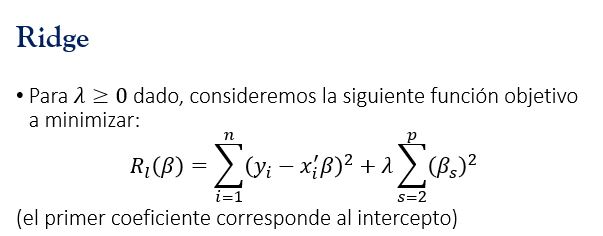

Usamos la funciones [Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) y [Lasso()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) para realizar distintas regresiones lineales regularizadas. Estas funciones tienen un argumento  **alfa** $\alpha$ (es el **λ** pero con otro nombre) que **controla el peso de la regularización**.

In [81]:
from sklearn.preprocessing import StandardScaler

# Estadisticas antes de estandarizar
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,184.0,401.880435,148.411946,19.0,279.00,414.0,521.25,687.0
Hits,184.0,107.668478,45.708675,1.0,70.00,102.5,144.25,238.0
HmRun,184.0,11.597826,8.687734,0.0,5.00,9.0,17.00,40.0
Runs,184.0,54.907609,26.261966,0.0,33.00,52.0,73.25,130.0
RBI,184.0,51.114130,25.464279,0.0,31.75,46.5,71.25,121.0
Walks,184.0,40.956522,21.521580,0.0,23.00,37.0,57.25,105.0
Years,184.0,7.250000,4.880260,1.0,4.00,6.0,11.00,24.0
CAtBat,184.0,2608.994565,2313.977494,19.0,783.75,1823.0,3953.50,14053.0
CHits,184.0,711.298913,657.274645,4.0,190.00,473.0,1075.00,4256.0
CHmRun,184.0,66.092391,76.969990,0.0,15.75,37.0,84.25,384.0


In [83]:
# Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Estandarizamos las observaciones de test
X_test_transformed = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)

# Estadisticas de los predictores luego de estandarizar
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,184.0,4.344351e-17,1.002729,-2.586888,-0.830228,0.081884,0.806507,1.926378
Hits,184.0,6.275174e-17,1.002729,-2.340027,-0.826348,-0.113383,0.802503,2.859132
HmRun,184.0,1.930823e-17,1.002729,-1.338608,-0.761514,-0.299838,0.623513,3.278147
Runs,184.0,7.240585e-17,1.002729,-2.096470,-0.836471,-0.111018,0.700345,2.867161
RBI,184.0,-4.827057e-17,1.002729,-2.012764,-0.762518,-0.181695,0.792907,2.751955
Walks,184.0,-1.080054e-16,1.002729,-1.908237,-0.836626,-0.184341,0.759142,2.983899
Years,184.0,9.654113e-18,1.002729,-1.284164,-0.667765,-0.256833,0.770498,3.441559
CAtBat,184.0,-7.240585e-17,1.002729,-1.122337,-0.790943,-0.340599,0.582622,4.959093
CHits,184.0,2.413528e-17,1.002729,-1.079045,-0.795286,-0.363545,0.554857,5.407744
CHmRun,184.0,-7.240585e-18,1.002729,-0.861020,-0.655837,-0.379002,0.236549,4.141550


### 5. Regresión con Ridge

Empecemos con un modelo sin shrinkage $\alpha =0$:

In [86]:
alpha = 0
print("Alpha/lambda:", alpha)

ridge_a0 = Ridge(alpha = alpha)
ridge_a0.fit(X_train_transformed, y_train)             
pred_a0 = ridge_a0.predict(X_test_transformed)
mse_a0 = mean_squared_error(y_test, pred_a0)

print("Mean Squared Error de testeo (MSE test): ", round(mse_a0,2))   
print("Coeficientes del modelo:")
print(pd.Series(ridge_a0.coef_, index = X_train_transformed.columns).round(2)) 

Alpha/lambda: 0
Mean Squared Error de testeo (MSE test):  123843.3
Coeficientes del modelo:
AtBat         -382.47
Hits           434.31
HmRun           44.73
Runs           -56.32
RBI            -92.36
Walks          148.75
Years            7.55
CAtBat        -665.74
CHits          380.59
CHmRun          77.89
CRuns          431.65
CRBI           199.68
CWalks        -225.06
PutOuts         77.55
Assists         61.50
Errors         -18.57
League_N         4.34
Division_W     -46.31
NewLeague_N    -29.25
dtype: float64


El $MSE_{test}$ con $\alpha=0$ es: 123,843.3 

Probemos elegir arbitrariamente el alpha usando $\alpha=1$:

In [88]:
alpha = 1
print("Alpha:", alpha)

ridge_a1 = Ridge(alpha = alpha)
ridge_a1.fit(X_train_transformed, y_train)             
pred_a1 = ridge_a1.predict(X_test_transformed)
ecm_a1 = mean_squared_error(y_test, pred_a1)

print("Mean Squared Error de testeo (MSE test): ", round(ecm_a1,2))   
print("Coeficientes del modelo:")
print(pd.Series(ridge_a1.coef_, index = X_train_transformed.columns).round(2)) 

Alpha: 1
Mean Squared Error de testeo (MSE test):  117196.67
Coeficientes del modelo:
AtBat         -351.31
Hits           379.94
HmRun           24.94
Runs           -21.88
RBI            -69.23
Walks          133.91
Years          -46.02
CAtBat        -248.14
CHits          176.13
CHmRun          79.97
CRuns          282.11
CRBI           154.54
CWalks        -197.35
PutOuts         76.87
Assists         51.16
Errors         -21.88
League_N         3.23
Division_W     -52.45
NewLeague_N    -29.05
dtype: float64


El $MSE_{test}$ con $\alpha = 1$ es 117,196.67

Ahora probemos que pasa con un alpha muy grande, por ej. $\alpha=10^{10}$:

In [96]:
alpha = 10**10
print("Alpha:", alpha)

ridge_a10b = Ridge(alpha)
ridge_a10b.fit(X_train_transformed, y_train)             
pred_a10b = ridge_a10b.predict(X_test_transformed)  
ecm_a10b = mean_squared_error(y_test, pred_a10b)

print("Mean Squared Error de testeo (MSE test): ", ecm_a10b)   
print("Coeficientes del modelo:")
print(pd.Series(ridge_a10b.coef_, index = X_train_transformed.columns).round(2)) 

Alpha: 10000000000
Mean Squared Error de testeo (MSE test):  238884.0557421372
Coeficientes del modelo:
AtBat          0.0
Hits           0.0
HmRun          0.0
Runs           0.0
RBI            0.0
Walks          0.0
Years          0.0
CAtBat         0.0
CHits          0.0
CHmRun         0.0
CRuns          0.0
CRBI           0.0
CWalks         0.0
PutOuts        0.0
Assists        0.0
Errors         0.0
League_N      -0.0
Division_W    -0.0
NewLeague_N   -0.0
dtype: float64


In [98]:
pred_a10b

array([521.60922299, 521.60921214, 521.60928972, 521.60924747,
       521.60929337, 521.60923264, 521.60928753, 521.60924089,
       521.60935134, 521.60928276, 521.60933159, 521.60926766,
       521.609209  , 521.60927102, 521.60927429, 521.60923565,
       521.60926658, 521.60922706, 521.60925071, 521.6092239 ,
       521.60928629, 521.60932688, 521.60923512, 521.60921346,
       521.60925008, 521.60925507, 521.60931753, 521.60926812,
       521.6092408 , 521.6092861 , 521.60924771, 521.60930644,
       521.60920973, 521.60926984, 521.60922143, 521.60923525,
       521.60925183, 521.60922334, 521.60928677, 521.60926998,
       521.6092664 , 521.60922507, 521.60923904, 521.60923188,
       521.60921642, 521.60920502, 521.60929058, 521.60925141,
       521.60927029, 521.60933294, 521.60924723, 521.60923508,
       521.60923943, 521.60923686, 521.60928321, 521.6092765 ,
       521.60924252, 521.60923425, 521.60925691, 521.60925041,
       521.60925794, 521.60925727, 521.6092597 , 521.60

El $MSE_{test}$ con $\alpha=10^{10}$ es 238,884.06

Esta gran penalización reduce los coeficientes en un grado muy grande, esencialmente reduciéndose a un modelo que contiene solo el intercepto. Esta contracción excesiva hace que el modelo sea demasiado sesgado, lo que resulta en un ECM más alto.

#### Plot Ridge: coeficientes según parámetros de ajuste alfa

Generaremos una matriz de valores alfa que van desde muy grandes a muy pequeños, esencialmente cubriendo la gama completa de escenarios desde el modelo nulo que contiene solo la intersección, hasta el ajuste de mínimos cuadrados.

Estandarizamos los datos y ajustamos los modelos Lasso para cada valor de alfa.

Ahora veamos la relación entre alfa y los coeficientes, una línea para cada característica.

In [100]:
# Matriz de valores de alfa
alphas = 10**np.linspace(6,-2,50)*0.5
np.set_printoptions(suppress = True)
alphas

array([500000.        , 343324.42250215, 235743.31817287, 161872.87714088,
       111149.82412631,  76320.89835876,  52405.65670773,  35984.28365006,
        24708.56680662,  16966.10885948,  11649.75905258,   7999.29359803,
         5492.70570994,   3771.56003168,   2589.73733962,   1778.24015311,
         1221.02654727,    838.41646841,    575.69769966,    395.30216055,
          271.43377197,    186.37968602,    127.97739613,     87.87553124,
           60.33963203,     41.43213864,     28.44933015,     19.53469969,
           13.41347898,      9.21034985,      6.32427608,      4.34255687,
            2.98181166,      2.04745753,      1.40588435,      0.96534886,
            0.66285568,      0.45514909,      0.3125276 ,      0.21459671,
            0.14735259,      0.10117948,      0.06947477,      0.04770477,
            0.03275643,      0.02249216,      0.01544422,      0.01060475,
            0.00728174,      0.005     ])

In [102]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_transformed, y_train)
    coefs.append(ridge.coef_)

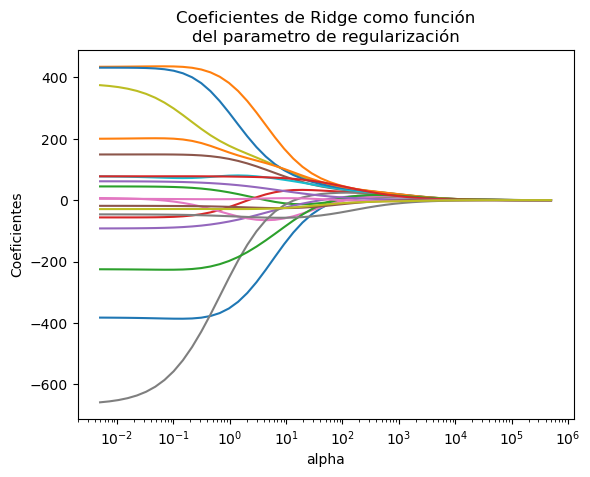

In [104]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("Coeficientes")
plt.title("Coeficientes de Ridge como función" "\ndel parametro de regularización")
plt.axis("tight")
plt.show()

En el lado izquierdo casi no hay penalización, por lo que se pueden observar todos los valores que toman los coeficientes de las disttintas variables. En el lado derecho podemos ver un modelo con coeficientes muy cercanos a cero. Esto se debe a una penalización muy alta. 

Bien, entonces ajustar un modelo de regresión de Ridge con $\alpha = 1$ conduce a un $MSE_{test}$  de prueba más bajo que ajustar un modelo con solo una intersección. 

Ahora verificamos si existe algún beneficio al realizar la regresión de Ridge con alpha = 1 en lugar de simplemente realizar la regresión por mínimos cuadrados. 

In [106]:
from sklearn.linear_model import LinearRegression
modelo_lineal = LinearRegression().fit(X_train_transformed, y_train)
pred_lin = modelo_lineal.predict(X_test_transformed)
mse_lin = mean_squared_error(y_test, pred_lin)

print("Mean Squared Error de testeo (MSE test): ", round(mse_lin,2)) 
print("Coeficientes de la regresión lineal:")
print(pd.Series(modelo_lineal.coef_, index = X_train_transformed.columns).round(2)) 

Mean Squared Error de testeo (MSE test):  123843.3
Coeficientes de la regresión lineal:
AtBat         -382.47
Hits           434.31
HmRun           44.73
Runs           -56.32
RBI            -92.36
Walks          148.75
Years            7.55
CAtBat        -665.74
CHits          380.59
CHmRun          77.89
CRuns          431.65
CRBI           199.68
CWalks        -225.06
PutOuts         77.55
Assists         61.50
Errors         -18.57
League_N         4.34
Division_W     -46.31
NewLeague_N    -29.25
dtype: float64


El modelo con Ridge es mejor que el de mínimos cuadrados ordinarios al comparar los $MSE_{test}$. 
Como era de esperar, ninguno de los coeficientes es exactamente cero. Recordar: la regresión de Ridge no realiza  selección de variables!

Ahora, en lugar de elegir arbitrariamente alpha $ = 1 $, sería mejor usar la validación cruzada para elegir el parámetro de ajuste alpha. 

#### Ridge con validación cruzada 

Nuevamente, realizamos una validación cruzada con k=5 para elegir el mejor alfa, reajustar el modo, calcular el error de prueba asociado e imprimir los mejores coeficientes de modelos. Esta vez regularizando con [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [110]:
ridgecv = RidgeCV(alphas=alphas, cv=5).fit(X_train_transformed, y_train)
print("El mejor alpha:", ridgecv.alpha_)

# Ahora con el alpha óptimo, volvemos a estimar nuestro modelo
ridge = Ridge(alpha=ridgecv.alpha_)
ridge = ridge.fit(X_train_transformed, y_train)
ridge_pred = ridge.predict(X_test_transformed)
mse_ridge = mean_squared_error(y_test, ridge_pred)

print("Mean Squared Error de testeo (MSE test):", round(mse_ridge,2))   

print("Coeficientes del mejor modelo:")
print(pd.Series(ridgecv.coef_, index = X_train_transformed.columns).round(2)) 

El mejor alpha: 1.4058843489871153
Mean Squared Error de testeo (MSE test): 115966.66
Coeficientes del mejor modelo:
AtBat         -331.35
Hits           355.63
HmRun           19.66
Runs           -12.26
RBI            -63.62
Walks          127.81
Years          -53.06
CAtBat        -196.81
CHits          163.77
CHmRun          80.53
CRuns          246.48
CRBI           145.66
CWalks        -185.36
PutOuts         76.48
Assists         48.71
Errors         -22.70
League_N         3.57
Division_W     -53.59
NewLeague_N    -29.08
dtype: float64
